# Get metrics and Plot

In [1]:
import matplotlib.pyplot as plt
from train import *
from sklearn.metrics import r2_score

In [2]:
transformer_path = "logs/transformer_tune_seed0_lr7.7e-05_bs_1_Tue Feb 28 12:14:22 2023"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [450]:
evaluator = Evaluator("logs/SFNP_train_seed0_lr0.000168_bs_1_Tue Feb 28 01:09:51 2023")

In [454]:
# non_mae, nmae, r = evaluator.get_metrics(evaluator.testloader)
non_mae = np.load("../../notebooks/metrics/sfnp_test_non_mae.npy")
nmae = np.load("../../notebooks/metrics/sfnp_test_nmae.npy")
r = np.load("../../notebooks/metrics/sfnp_test_r.npy")

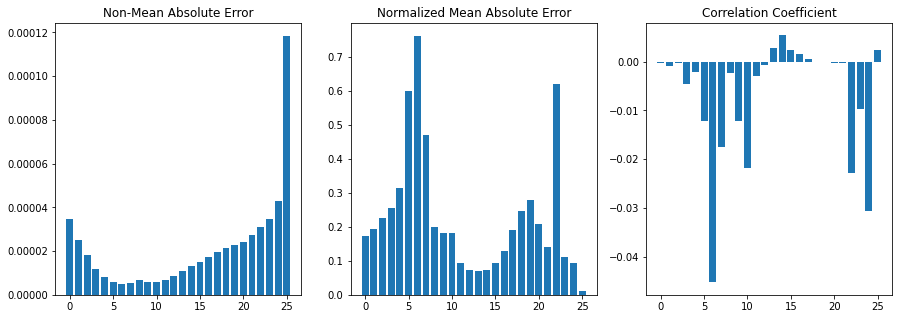

In [456]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].bar(np.arange(26), non_mae)
axs[0].set_title("Non-Mean Absolute Error")
axs[1].bar(np.arange(26), nmae)
axs[1].set_title("Normalized Mean Absolute Error")
axs[2].bar(np.arange(26), r)
axs[2].set_title("Correlation Coefficient")
plt.savefig("../../notebooks/plots/sfnp_test_metrics.jpg")
plt.show()

In [439]:
# non_y, non_y_pred, context_idxs, y = evaluator.plot_scenario(0, split="test")
non_y, non_y_context, non_y_pred, context_idxs, target_idxs\
     = evaluator.plot_scenario(0, split="train")

  0%|          | 0/292 [00:03<?, ?it/s]


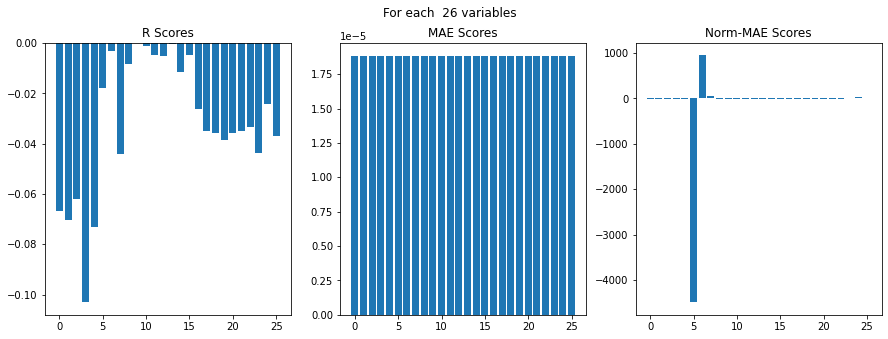

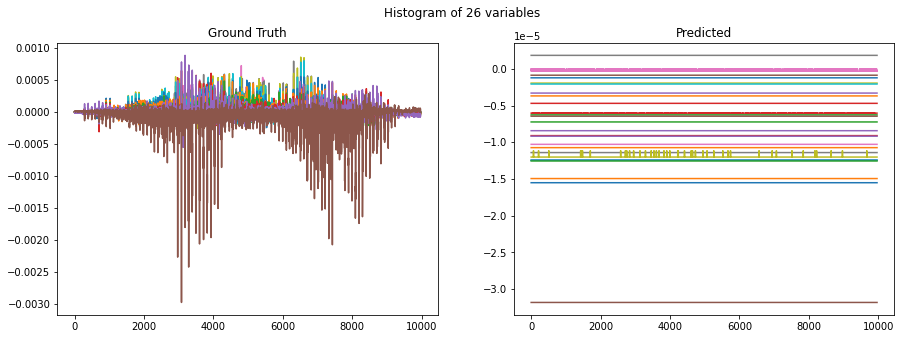

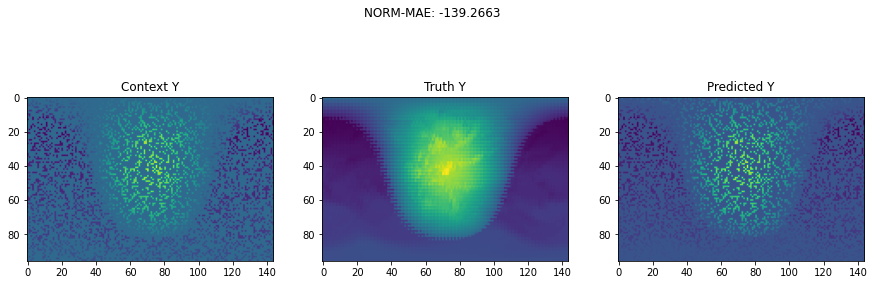

In [458]:
non_mae = mae_metric(non_y_pred, non_y[target_idxs], mean=True)
R_scores = []
vars = np.arange(26)
for i in vars:
    R_scores.append(r2_score(non_y[target_idxs][:, i], non_y_pred[:, i]))
norm_mae = non_mae / non_y[target_idxs].mean(0)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].bar(vars, R_scores)
axs[0].set_title("R Scores")
axs[1].bar(vars, non_mae)
axs[1].set_title("MAE Scores")
axs[2].bar(vars, norm_mae)
axs[2].set_title("Norm-MAE Scores")
plt.suptitle("For each  26 variables")
plt.savefig("../../notebooks/plots/sfnp_test_metrics_single.jpg")
plt.show()



fig, axs= plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(non_y[target_idxs])
axs[0].set_title("Ground Truth")
axs[1].plot(non_y_pred)
axs[1].set_title("Predicted")
plt.suptitle("Histogram of 26 variables")
plt.savefig("../../notebooks/plots/sfnp_test_hist_single.jpg")
plt.show()



contexts = np.zeros_like(non_y)
contexts[context_idxs] = non_y_context

results = np.zeros_like(non_y)
results[target_idxs] = non_y_pred
results[context_idxs] = non_y_context


fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(contexts.reshape(96, 144, -1)[:, :, 0])
axs[0].set_title("Context Y")
axs[1].imshow(non_y.reshape(96, 144, -1)[:, :, 0])
axs[1].set_title("Truth Y")
axs[2].imshow(results.reshape(96, 144, -1)[:, :, 0])
axs[2].set_title("Predicted Y")
plt.suptitle(f"NORM-MAE: {norm_mae.mean():.4f}")
plt.savefig("../../notebooks/plots/sfnp_test_viz_single.jpg")
plt.show()

In [350]:
non_y_pred.shape

(13824, 26)

In [349]:
results[context_idxs].shape

(4402, 26)

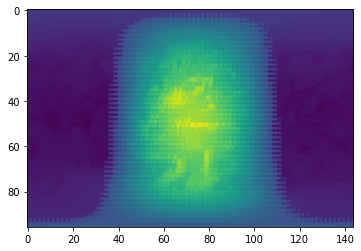

In [282]:
# x = np.load("inputs_2003_01_06.npy")
y = np.load("/home/mkim/Nserver/climate_processes/data/SPCAM5/outputs_2003-04-01.npy")
y_l1 = np.load("/home/mkim/Nserver/climate_processes/data/CAM5/outputs_2003-04-01.npy")

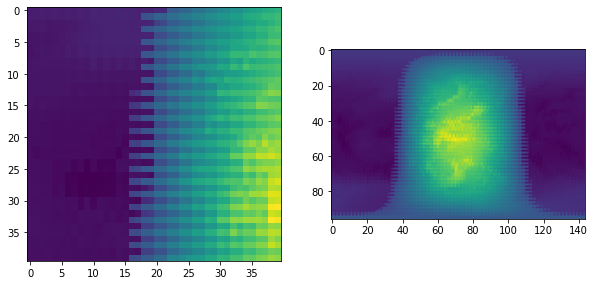

In [313]:
y_ = y.reshape(24, 96, 144, -1)
i = 0
v = 0
tl = y_[:, :48, :72, :]
tr = y_[:, :48, 72:, :]
bl = y_[:, 48:, :72, :]
br = y_[:, 48:, 72:, :]

result = np.zeros_like(y_)
result[:, ::2, ::2] = tl
result[:, ::2, 1::2] = tr
result[:, 1::2, ::2] = bl
result[:, 1::2, 1::2] = br

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(result[0, 20:60, 20:60, 0])
axs[1].imshow(result[0, :, :, 0])
# plt.imshow(result)
plt.show()

In [261]:
y_.shape

(24, 96, 144, 112)

In [262]:
y_ = y_.reshape(24, 96, 144, 112)
y_.shape

(24, 96, 144, 112)